***Problem Statement***

* Given a dataset for medical insurence.
* Analysing the dataset , I have to build a machine learning model that will predict the insurence cost would be?

#***Data Reading***

In [ ]:
# reading the data
import pandas as pd

df = pd.read_csv('/content/insurance.csv') # giving path to only read the data file




#***Important Libraries***

In [ ]:
import pandas as pd #for data processing
import numpy as np # for linear algebra


# For data visualisation

import matplotlib.pyplot as plt
import seaborn as sns


# ***Data Analysis***

In [ ]:
# to check the shape of the data frame
df.shape

(1338, 7)



So,the data frame has 1338 number of rows and 7 columns



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB




1.  First line:df is data frame is made by calling 'pandas.core.frame'
2.   Second line:it has 1338 rows starting index from 0 to 1337
3. Third line:fd has total 7 columns
4. In "#" 0 to 6,showing the columns name and the corresponding number of  non-null(not NaN) value present and corresponding dtype

e.g.[0 ,  age  ,     1338 non-null,   int64 ]=>in the zero index,there has a 'age' column with 1338 non NaN values and the data type is int64

 



In [ ]:
# checking the head of the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#Checking if there is any Nan value present

df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

***GREAT***!!!,there is not a single NaN value present in any of the columns.

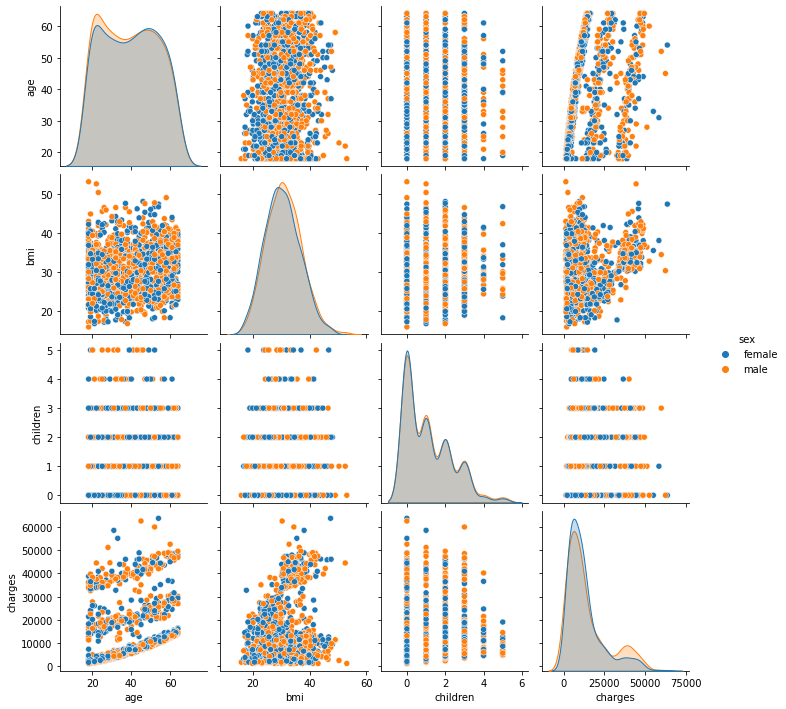

In [ ]:
#making a pair plot among the different features
sns.pairplot(df,hue='sex')

As,clear from th eabove pair plot is that,male and female are eqauuly distributed.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


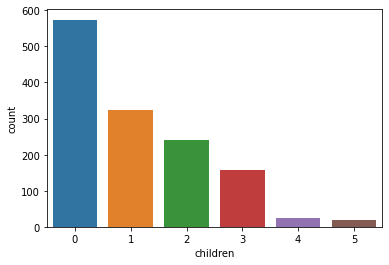

In [ ]:
sns.countplot('children',data=df)

with 5 children appears the least and no-children appears the most frequent.

In [ ]:
# unique value counts in the sex category

df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Text(0.5, 1.0, 'A pie chart representing share of men and women ')

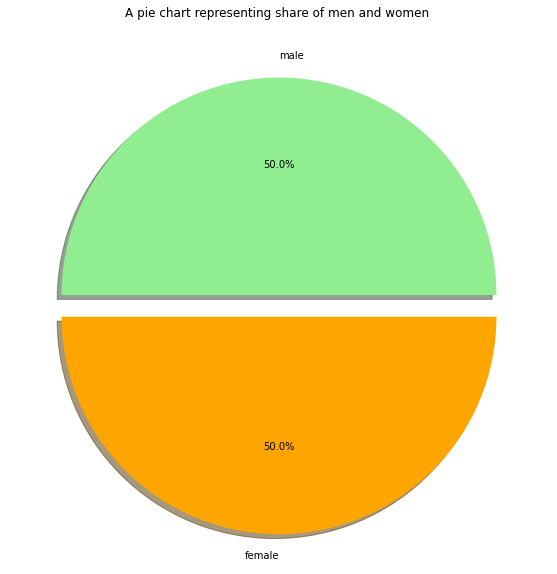

In [ ]:
#pie Chart

size=[650,650]
colors=['lightgreen','orange']
labels=['male','female']
explode = (0, 0.1) #seperation between two pie

plt.rcParams['figure.figsize']=(10,10)
plt.pie(size, colors = colors, labels = labels, shadow = True,explode=explode,autopct='%1.1f%%')

#"autopct":A list of Text instances for the numeric labels

plt.title('A pie chart representing share of men and women ')



!!! Equal share of male and female.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


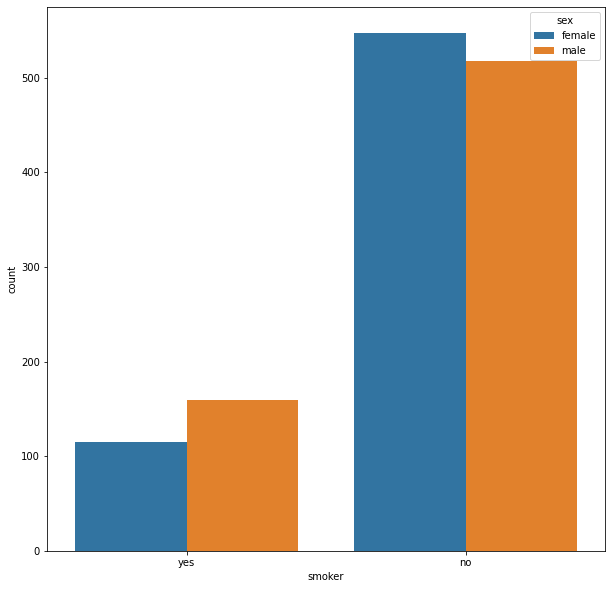

In [ ]:
# checking how many people smoke



sns.countplot('smoker',hue='sex',data=df)

***For male and Female***:those who smokes,takes the least insurance(Strange!!)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


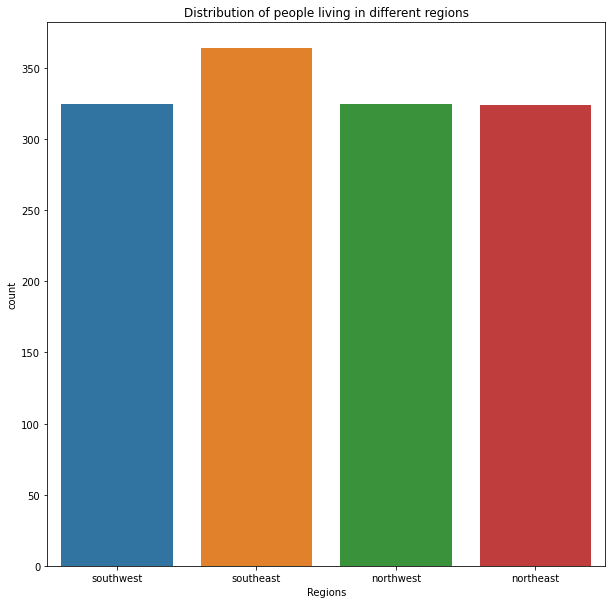

In [ ]:
# visualizing the regions from where the people belong

sns.countplot( df['region'])
plt.title('Distribution of people living in different regions')
plt.xlabel('Regions')
plt.ylabel('count')
plt.show()

*Irrespective of the region,people from all region takes insurence in almost equal amount*

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

**bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9**

Text(0.5, 1.0, 'Age vs Charges')

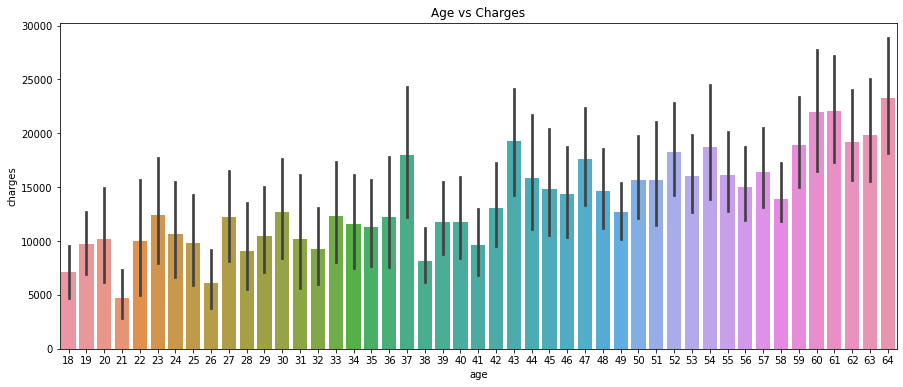

In [ ]:
plt.figure(figsize=(15,6))

sns.barplot(x='age',y='charges',data=df)
plt.title('Age vs Charges')

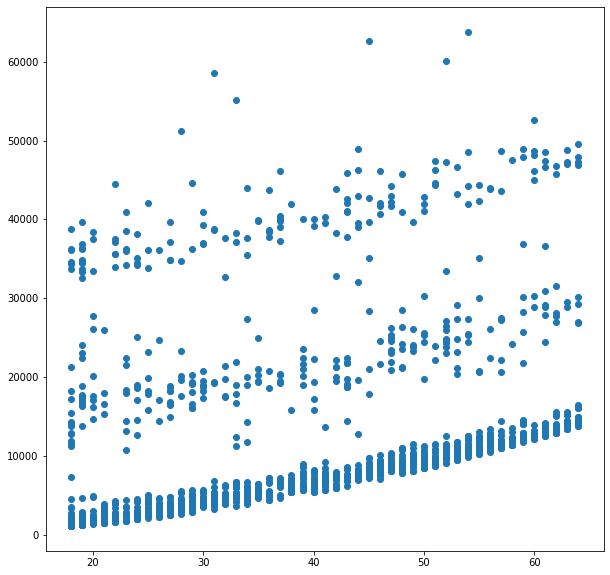

In [ ]:
x=df['age']
y=df['charges']

plt.scatter(x,y)

*So, as age increases,charges increases*

Text(0.5, 1.0, 'sex vs charges')

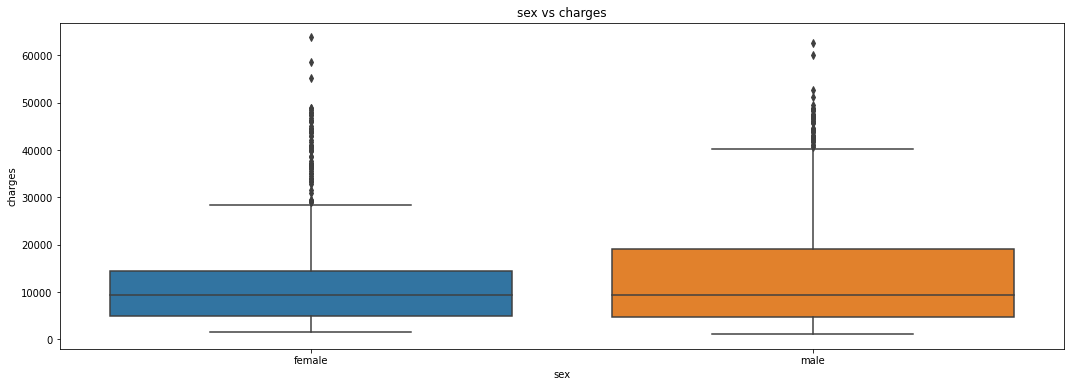

In [ ]:
# sex vs charges
#

plt.figure(figsize = (18, 6))
sns.boxplot(x = 'sex', y = 'charges', data = df)

plt.title('sex vs charges')

 Males have slightly greater insurance charges than females in general

Text(0.5, 1.0, 'children vs charges')

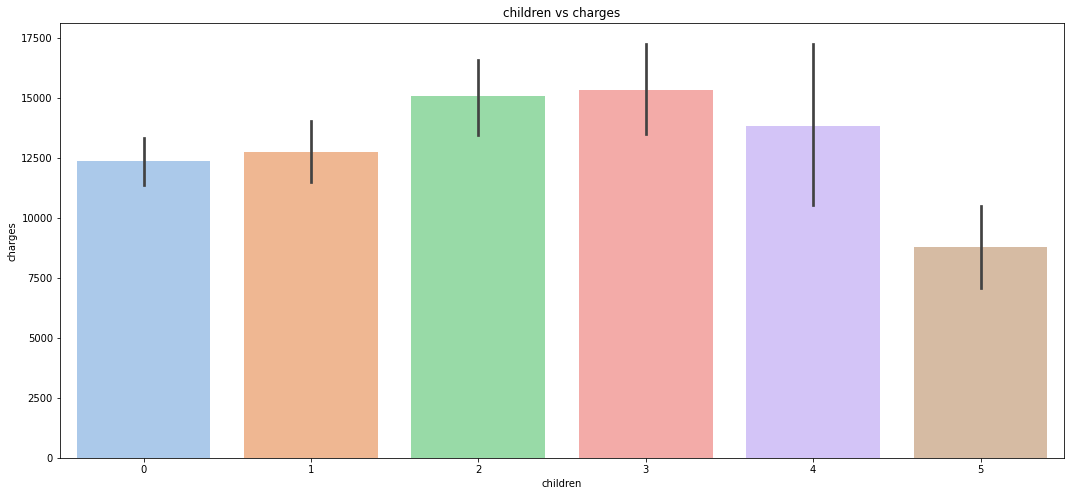

In [ ]:
# children vs charges
# no. of childrens of a person has a very interesting dependency on insurance costs

plt.figure(figsize = (18, 8))
sns.barplot(x = 'children', y = 'charges', data = df, palette ='pastel')

plt.title('children vs charges')

Person with 2-3 children has more insurence charges than person with 5 children

Text(0.5, 1.0, 'region vs charges')

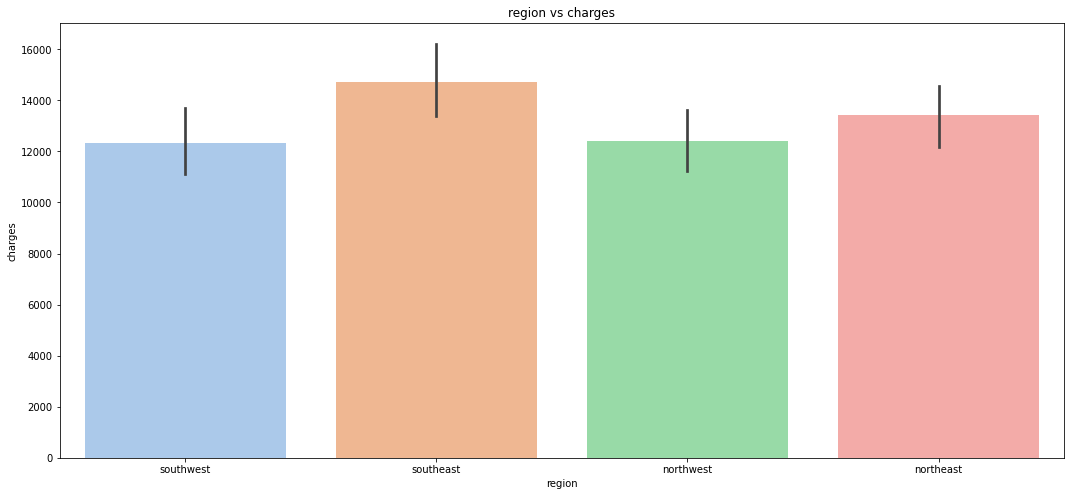

In [ ]:
#region vs charges
plt.figure(figsize = (18, 8))
sns.barplot(x = 'region', y = 'charges', data = df, palette ='pastel')

plt.title('region vs charges')


See,region does not play any important role in determing insurence charges..

Text(0.5, 1.0, 'children vs charges')

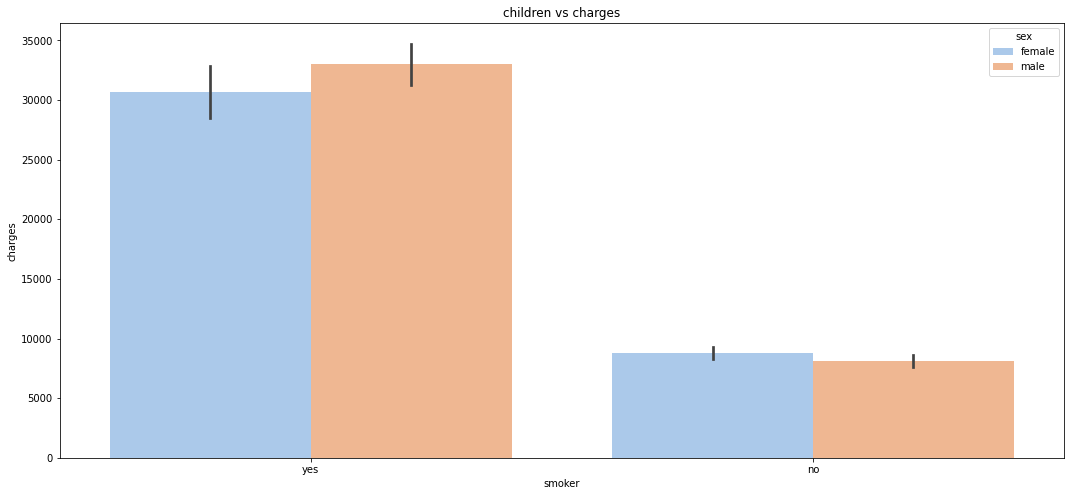

In [ ]:
#charges vs smoker

plt.figure(figsize = (18, 8))
sns.barplot(x = 'smoker', y = 'charges',hue='sex', data = df, palette ='pastel')

plt.title('children vs charges')

Both for male and female with who are smoker having more charges than those are non-smoker.

#***Data Processing***

In [ ]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
#for label encoding
dct={'southeast':0,'northwest':1,'southwest':2,'northeast':3}
df['region']=df['region'].map(dct)

In [ ]:
df['region']

0       2
1       0
2       0
3       1
4       1
       ..
1333    1
1334    3
1335    0
1336    2
1337    1
Name: region, Length: 1338, dtype: int64

In [ ]:
# label encoding for sex and smoker

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encoder
le = LabelEncoder()


# label encoding for sex
# 0 for females and 1 for males
df['sex'] = le.fit_transform(df['sex'])

# label encoding for smoker
# 0 for smokers and 1 for non smokers
df['smoker'] = le.fit_transform(df['smoker'])

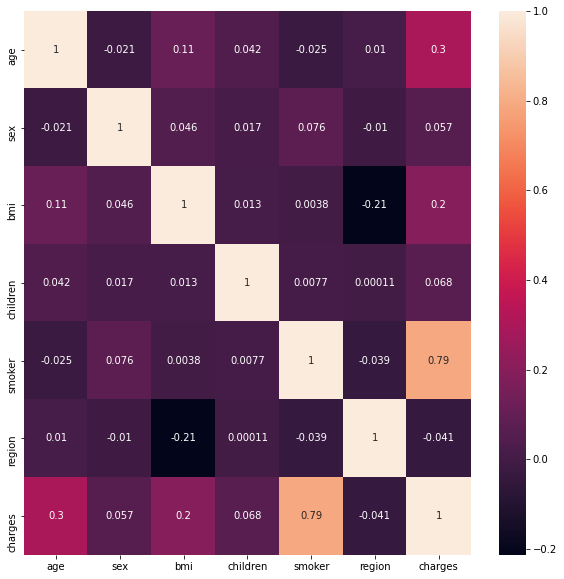

In [ ]:
sns.heatmap(df.corr(),annot=True)

*As,the dependency of 'region' with 'charges' is -0.041(very small),I can drop it*

In [ ]:
#Droping 'region' from the data set df
df=df.drop('region',axis=1)

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')

#***Model Building***

In [ ]:
# splitting the dependent and independent variable

x = df.iloc[:,:5]
y = df.iloc[:,5] # taking 5th column

print(x.shape)
print(y.shape)

(1338, 5)
(1338,)


In [ ]:
# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1070, 5)
(268, 5)
(1070,)
(268,)


In [ ]:
# standard scaling

from sklearn.preprocessing import StandardScaler

# creating a standard scaler
sc = StandardScaler()

# feeding independents sets into the standard scaler
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# ***Linear Regression***

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() #create the object of the model
lr=lr.fit(x_train,y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

***Training Accurecy***

In [ ]:
pred_train=lr.predict(x_train) # fit the model into linear regression and returns a (1070,1) datafram
s_train=mean_absolute_error(y_train,pred_train) #measure the absolute error= |y_pred-y_test|
s1_train=mean_squared_error(y_train,pred_train) # measure (y_pred-y_test)^2
s2_train=r2_score(y_train,pred_train) 


print("The MAE with the linear regressor for training is: "+str(s_train))
print("The MsE with the linear regressor for training is: "+str(s1_train))
print("The R2_Score with the linear regressor for training is: "+str(s2_train))

The MAE with the linear regressor for training is: 4172.250861973695
The MsE with the linear regressor for training is: 36644429.67691463
The R2_Score with the linear regressor for training is: 0.7463716002316689


***Testing Accurecy***

In [ ]:
pred=lr.predict(x_test) # fit the model into linear regression and returns a (1338,5) datafram
s=mean_absolute_error(y_test,pred) #measure the absolute error= |y_pred-y_test|
s1=mean_squared_error(y_test,pred) # measure (y_pred-y_test)^2
s2=r2_score(y_test,pred) 


print("The MAE with the linear regressor is: "+str(s))
print("The MsE with the linear regressor is: "+str(s1))
print("The R2_Score with the linear regressor is: "+str(s2))

The MAE with the linear regressor is: 4113.3231348409
The MsE with the linear regressor is: 37806750.25007656
The R2_Score with the linear regressor is: 0.75490433195409


# Conclusion

*AS,the difference between training and testing accrurecy(r2_score) is very small(0.7549-0.7463)=0.0086,so,this model is best fit.*